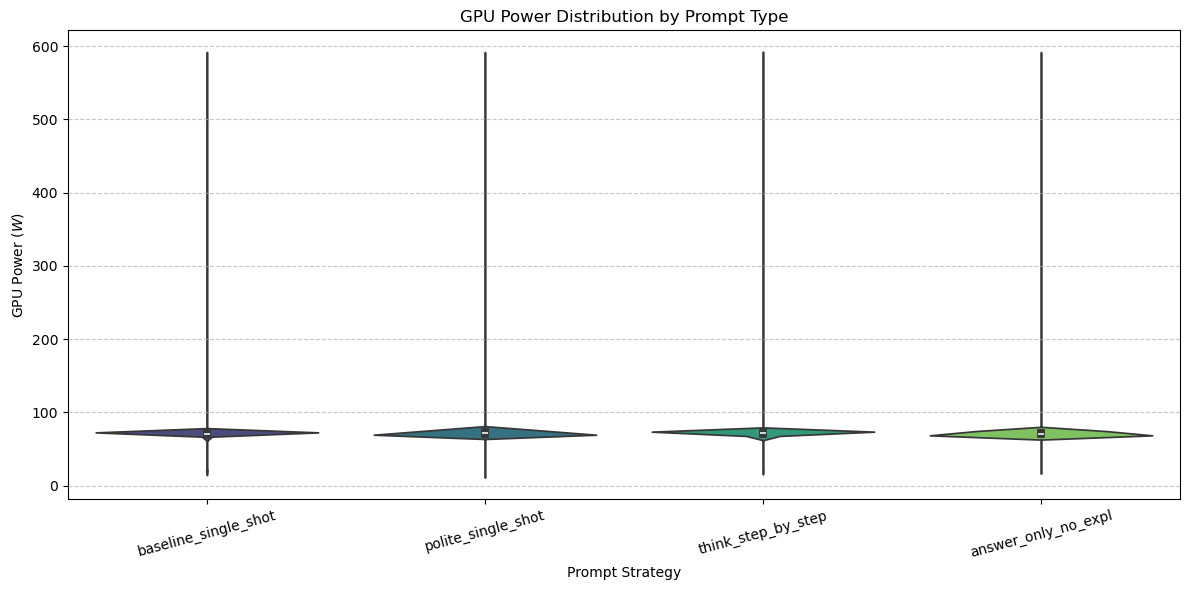

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
base_path = r"D:\sse\PromptEnergy\outputs\run_20260225_115145\bigcode_starcoder2-3b"
prompt_types = ['baseline_single_shot', 'polite_single_shot', 'think_step_by_step', 'answer_only_no_expl']
runs = ['r1', 'r2', 'r3']

all_gpu_data = []


for pt in prompt_types:
    for r in runs:
        file_path = os.path.join(base_path, pt, "humaneval_custom", r, "energy.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
 
            gpu_power_w = df['GPU0_POWER (mWatts)'] / 1000.0
            
            temp_df = pd.DataFrame({
                'Prompt Type': pt,
                'GPU Power (W)': gpu_power_w
            })
            all_gpu_data.append(temp_df)

# Combine all data
combined_gpu_df = pd.concat(all_gpu_data, ignore_index=True)


plt.figure(figsize=(12, 6))


sns.violinplot(
    data=combined_gpu_df, 
    x='Prompt Type', 
    y='GPU Power (W)', 
    hue='Prompt Type', 
    palette='viridis', 
    legend=False
)

plt.title('GPU Power Distribution by Prompt Type')
plt.xlabel('Prompt Strategy')
plt.ylabel('GPU Power ($W$)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('gpu_power_distribution.png')
plt.show()

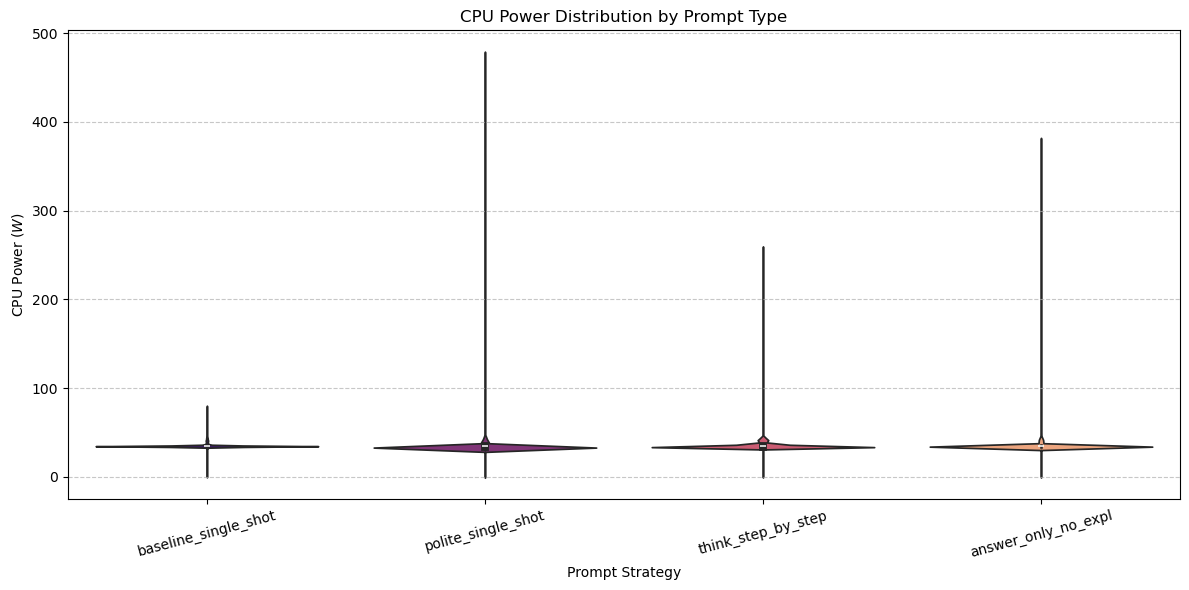

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuration
base_path = r"D:\sse\PromptEnergy\outputs\run_20260225_115145\bigcode_starcoder2-3b"
prompt_types = ['baseline_single_shot', 'polite_single_shot', 'think_step_by_step', 'answer_only_no_expl']
runs = ['r1', 'r2', 'r3']

all_cpu_data = []

# Data Loading and Processing
for pt in prompt_types:
    for r in runs:
        file_path = os.path.join(base_path, pt, "humaneval_custom", r, "energy.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
            # Calculate Power = Delta Energy (J) / Delta Time (s)
            # 'Delta' column is the interval in milliseconds
            delta_sec = df['Delta'] / 1000.0
            cpu_pwr = df['CPU_ENERGY (J)'].diff() / delta_sec
            
            # Clean up: first row will be NaN, and avoid division by zero
            cpu_pwr = cpu_pwr.replace([np.inf, -np.inf], np.nan).fillna(0)
            
            temp_df = pd.DataFrame({
                'Prompt Type': pt,
                'CPU Power (W)': cpu_pwr
            })
            all_cpu_data.append(temp_df)

# Combine all data
combined_cpu_df = pd.concat(all_cpu_data, ignore_index=True)

# Visualization
plt.figure(figsize=(12, 6))

# FIX: Added hue='Prompt Type' and legend=False to resolve the FutureWarning
sns.violinplot(
    data=combined_cpu_df, 
    x='Prompt Type', 
    y='CPU Power (W)', 
    hue='Prompt Type', 
    palette='magma', 
    legend=False
)

plt.title('CPU Power Distribution by Prompt Type')
plt.xlabel('Prompt Strategy')
plt.ylabel('CPU Power ($W$)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('cpu_power_distribution.png')
plt.show()

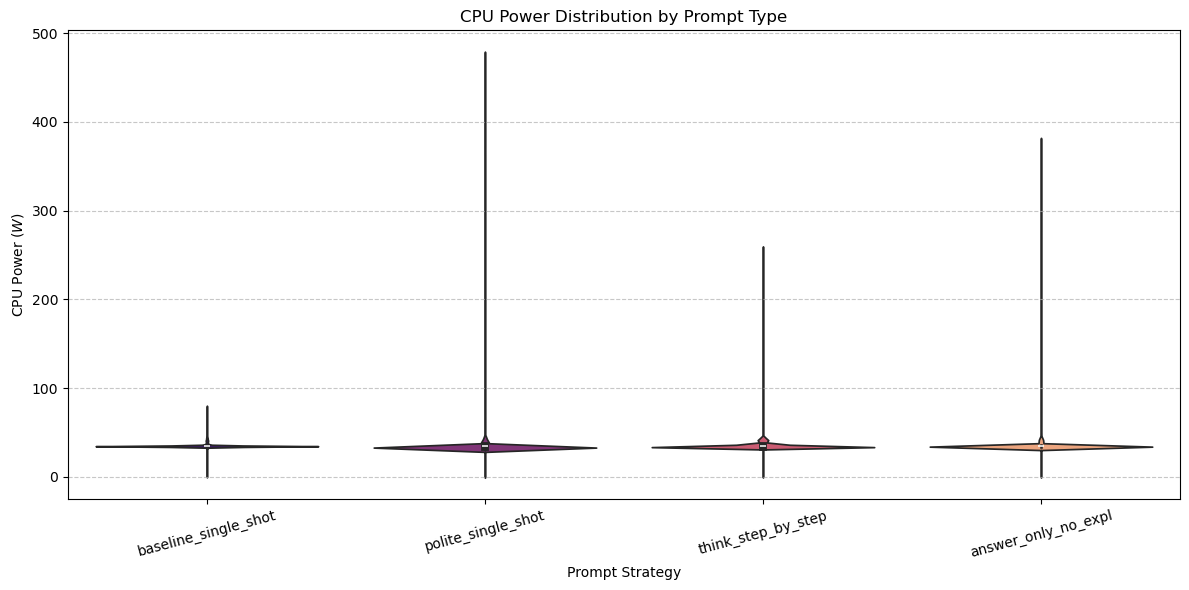

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuration
base_path = r"D:\sse\PromptEnergy\outputs\run_20260225_115145\bigcode_starcoder2-3b"
prompt_types = ['baseline_single_shot', 'polite_single_shot', 'think_step_by_step', 'answer_only_no_expl']
runs = ['r1', 'r2', 'r3']

all_cpu_data = []

# Data Loading and Processing
for pt in prompt_types:
    for r in runs:
        file_path = os.path.join(base_path, pt, "humaneval_custom", r, "energy.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
            # Calculate Power = Delta Energy (J) / Delta Time (s)
            # 'Delta' column is the interval in milliseconds
            delta_sec = df['Delta'] / 1000.0
            cpu_pwr = df['CPU_ENERGY (J)'].diff() / delta_sec
            
            # Clean up: first row will be NaN, and avoid division by zero
            cpu_pwr = cpu_pwr.replace([np.inf, -np.inf], np.nan).fillna(0)
            
            temp_df = pd.DataFrame({
                'Prompt Type': pt,
                'CPU Power (W)': cpu_pwr
            })
            all_cpu_data.append(temp_df)

# Combine all data
combined_cpu_df = pd.concat(all_cpu_data, ignore_index=True)

# Visualization
plt.figure(figsize=(12, 6))


sns.violinplot(
    data=combined_cpu_df, 
    x='Prompt Type', 
    y='CPU Power (W)', 
    hue='Prompt Type', 
    palette='magma', 
    legend=False
)

plt.title('CPU Power Distribution by Prompt Type')
plt.xlabel('Prompt Strategy')
plt.ylabel('CPU Power ($W$)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('cpu_power_distribution.png')
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_12208\1448070122.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_ratio_df, x='Prompt Type', y='CPU/GPU Usage Ratio', palette='plasma')


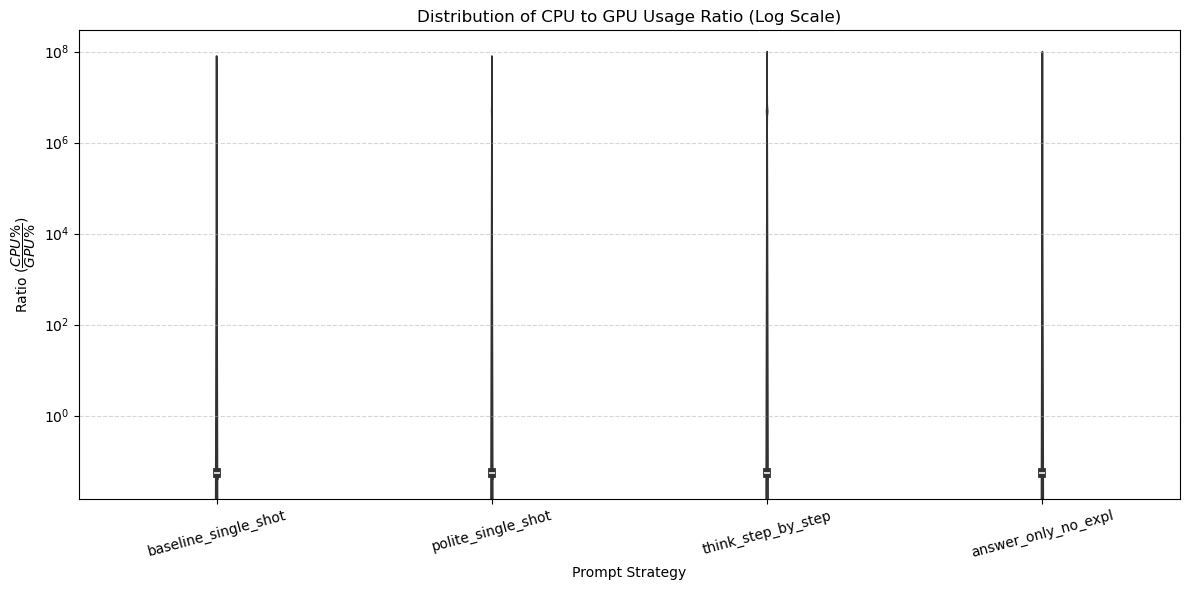

In [8]:
all_ratio_data = []

# Data Loading and Processing
for pt in prompt_types:
    for r in runs:
        file_path = os.path.join(base_path, pt, "humaneval_custom", r, "energy.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
            # 1. Calculate Average CPU Usage across all cores (0-31)
            cpu_usage_cols = [col for col in df.columns if 'CPU_USAGE' in col]
            avg_cpu_usage = df[cpu_usage_cols].mean(axis=1)
            
            # 2. Get GPU Usage
            gpu_usage = df['GPU0_USAGE']
            
            # 3. Calculate Ratio: CPU Usage / GPU Usage
            # We add a tiny epsilon (1e-6) to the denominator to avoid division by zero
            usage_ratio = avg_cpu_usage / (gpu_usage + 1e-6)
            
            temp_df = pd.DataFrame({
                'Prompt Type': pt,
                'CPU/GPU Usage Ratio': usage_ratio
            })
            all_ratio_data.append(temp_df)

# Combine all data
combined_ratio_df = pd.concat(all_ratio_data, ignore_index=True)

# Visualization
plt.figure(figsize=(12, 6))

# Note: Using log scale (yscale='log') is highly recommended for ratios 
# because they often contain extreme outliers.
sns.violinplot(data=combined_ratio_df, x='Prompt Type', y='CPU/GPU Usage Ratio', palette='plasma')
plt.yscale('log') 

plt.title('Distribution of CPU to GPU Usage Ratio (Log Scale)')
plt.xlabel('Prompt Strategy')
plt.ylabel('Ratio ($\dfrac{CPU\%}{GPU\%}$)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('cpu_gpu_usage_ratio.png')
plt.show()

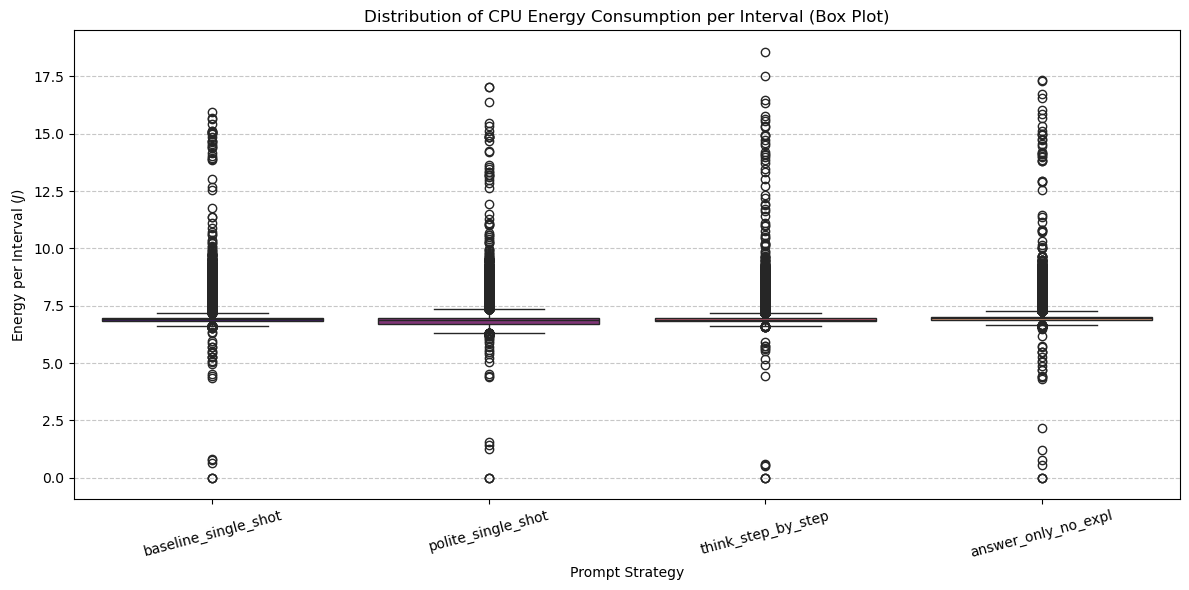

In [13]:
all_cpu_energy = []

# Data Loading and Processing
for pt in prompt_types:
    for r in runs:
        file_path = os.path.join(base_path, pt, "humaneval_custom", r, "energy.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            
            # Calculate Delta Energy (Joules per sample interval)
            # Energy is cumulative, so we take the difference.
            cpu_delta_joules = df['CPU_ENERGY (J)'].diff().fillna(0).clip(lower=0)
            
            temp_df = pd.DataFrame({
                'Prompt Type': pt,
                'CPU Energy (J)': cpu_delta_joules
            })
            all_cpu_energy.append(temp_df)

# Combine all data
combined_energy_df = pd.concat(all_cpu_energy, ignore_index=True)

# Visualization
plt.figure(figsize=(12, 6))

# Box plot showing the distribution and outliers
sns.boxplot(
    data=combined_energy_df, 
    x='Prompt Type', 
    y='CPU Energy (J)', 
    hue='Prompt Type', 
    palette='magma',
    legend=False  # Set to False to hide the redundant legend
)

plt.title('Distribution of CPU Energy Consumption per Interval (Box Plot)')
plt.xlabel('Prompt Strategy')
plt.ylabel('Energy per Interval ($J$)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('cpu_energy_boxplot.png')
plt.show()